## ECON 522 Lab - Week 2

Today, we will talk about a couple of things. (1) How to simulate an $AR(p)$ or an $MA(q)$ series in Python, (2) Some properties of each using ACF and the PACF and (3) talking more on persistence

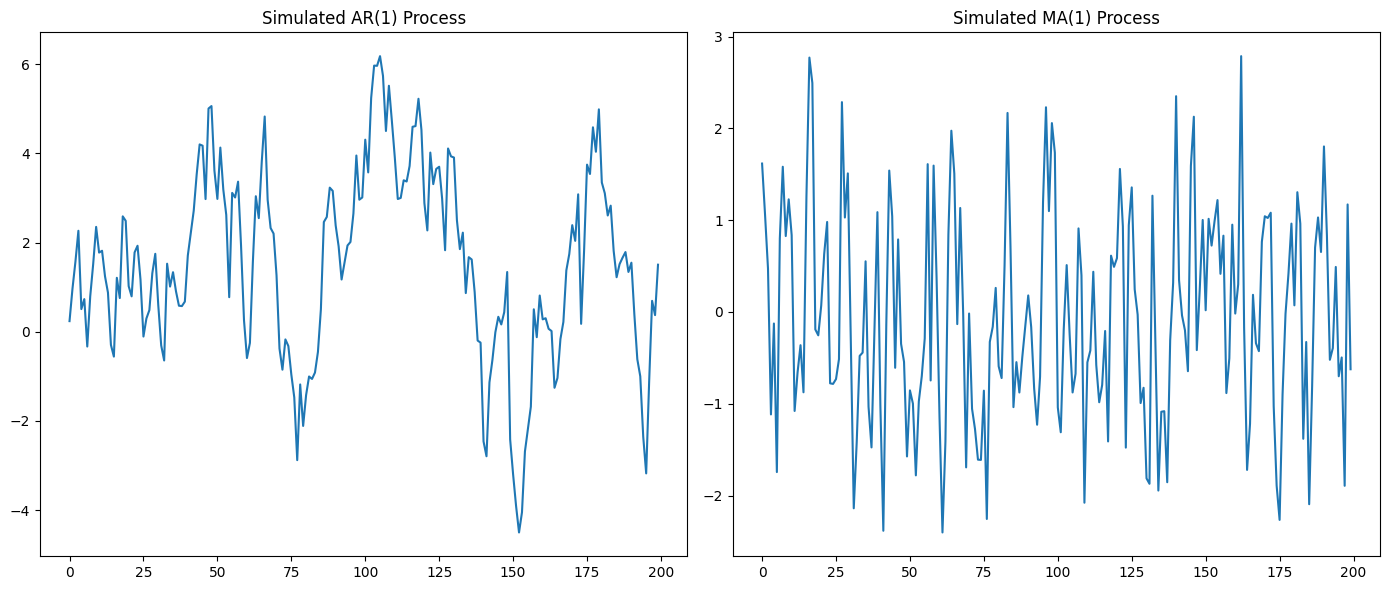

In [36]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess

import matplotlib.pyplot as plt

# Parameters
rho = 0.9
theta = 0.4
T = 200

# Simulate AR(1)
ar1 = np.array([1, -rho])
ma1 = np.array([1])
AR1_process = ArmaProcess(ar1, ma1)
simulated_AR1 = AR1_process.generate_sample(nsample=T)

# Simulate MA(1)
ar2 = np.array([1])
ma2 = np.array([1, theta])
MA1_process = ArmaProcess(ar2, ma2)
simulated_MA1 = MA1_process.generate_sample(nsample=T)

# Plot the simulated series
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(simulated_AR1)
plt.title('Simulated AR(1) Process')

plt.subplot(1, 2, 2)
plt.plot(simulated_MA1)
plt.title('Simulated MA(1) Process')

plt.tight_layout()
plt.show()

As you can see, by graphical inspection, it is kind of difficult to tell these apart. To be able to see something, let us look at the ACF and the PACF of each

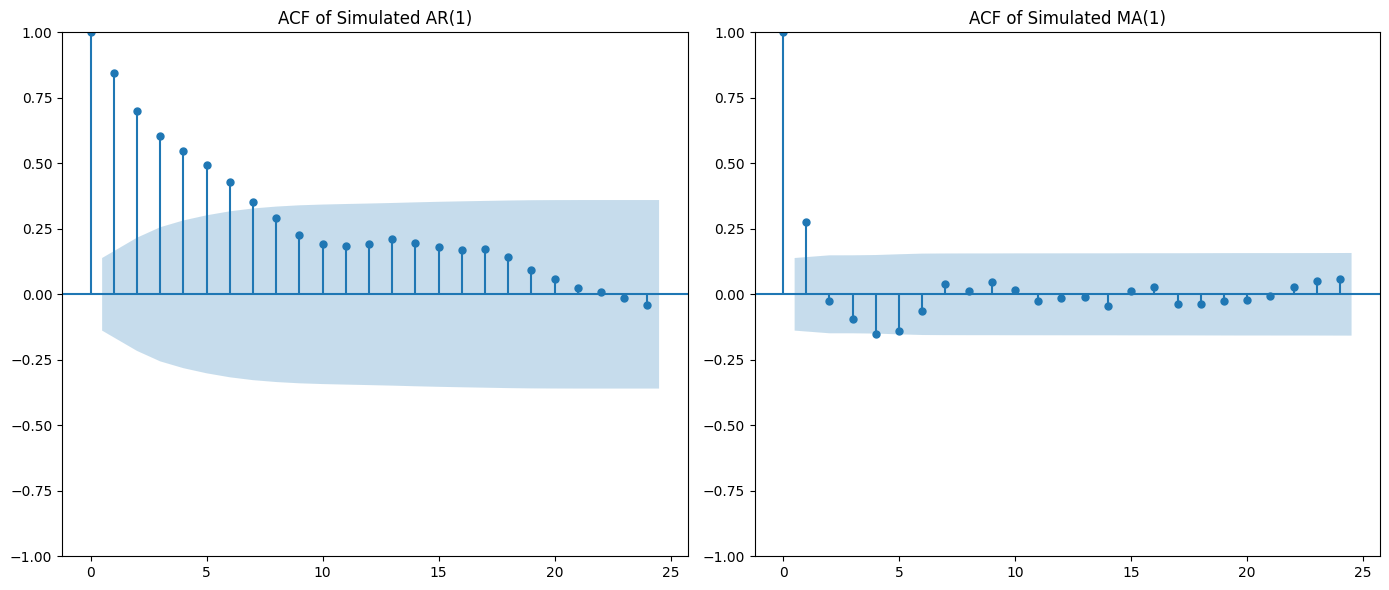

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(simulated_AR1, ax=plt.gca(), title='ACF of Simulated AR(1)')

plt.subplot(1, 2, 2)
plot_acf(simulated_MA1, ax=plt.gca(), title='ACF of Simulated MA(1)')

plt.tight_layout()
plt.show()

Notice that for the AR series, the ACF displays $\textbf{Geometric Decay}$, that is the AC is gradually decaying over time. By contrast, the ACF of the MA series displays an $\textbf{immediate dropoff}$ after the first period. Why the first period? Because we used 1 lag! 

Let's now apply this to an actual series. Let us use the sticky price inflation computed by the Atlanta Federal Reserve

1967-12-01         NaN
1968-01-01    3.709434
1968-02-01    3.735894
1968-03-01    4.181540
1968-04-01    4.164715
dtype: float64


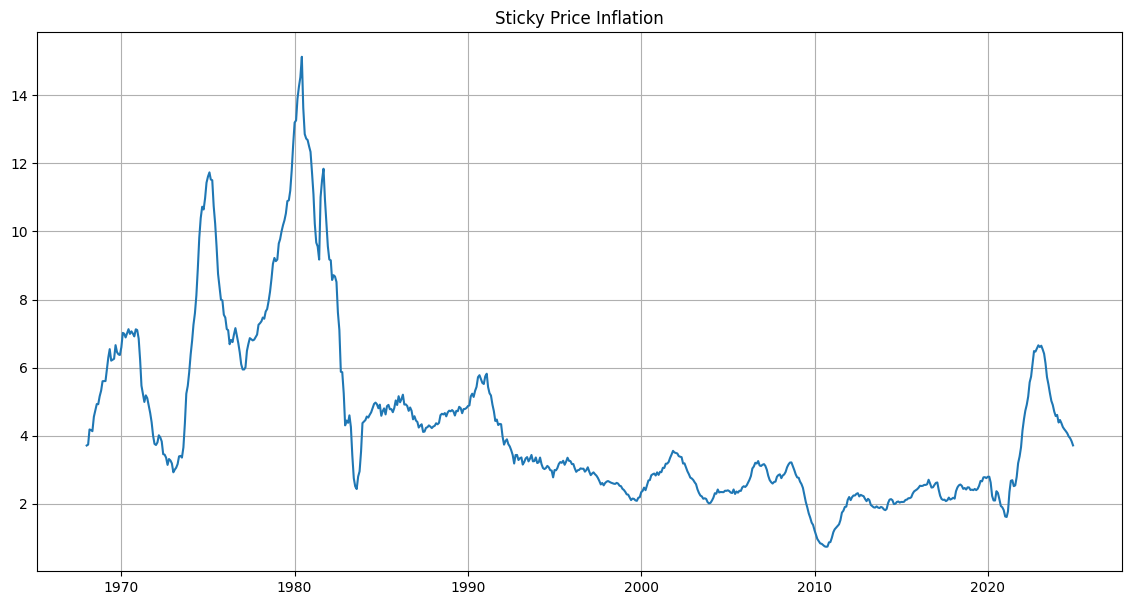

In [ ]:
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your actual FRED API key
fred = Fred(api_key='fe3741e38a5245c3cc826f2d6ae3e1f2')

# Download the sticky price inflation rate data
sticky_price_inflation = fred.get_series('STICKCPIM159SFRBATL')

# Display the first few rows of the data
print(sticky_price_inflation.head())

# Plot the sticky price inflation data
plt.figure(figsize=(14, 7))
plt.plot(sticky_price_inflation)
plt.title('Sticky Price Inflation')
plt.grid(True)
plt.show()

Then, we generate the ACF and PACF of this series. What do you observe? Consider the significance (or lack thereof of the lags)

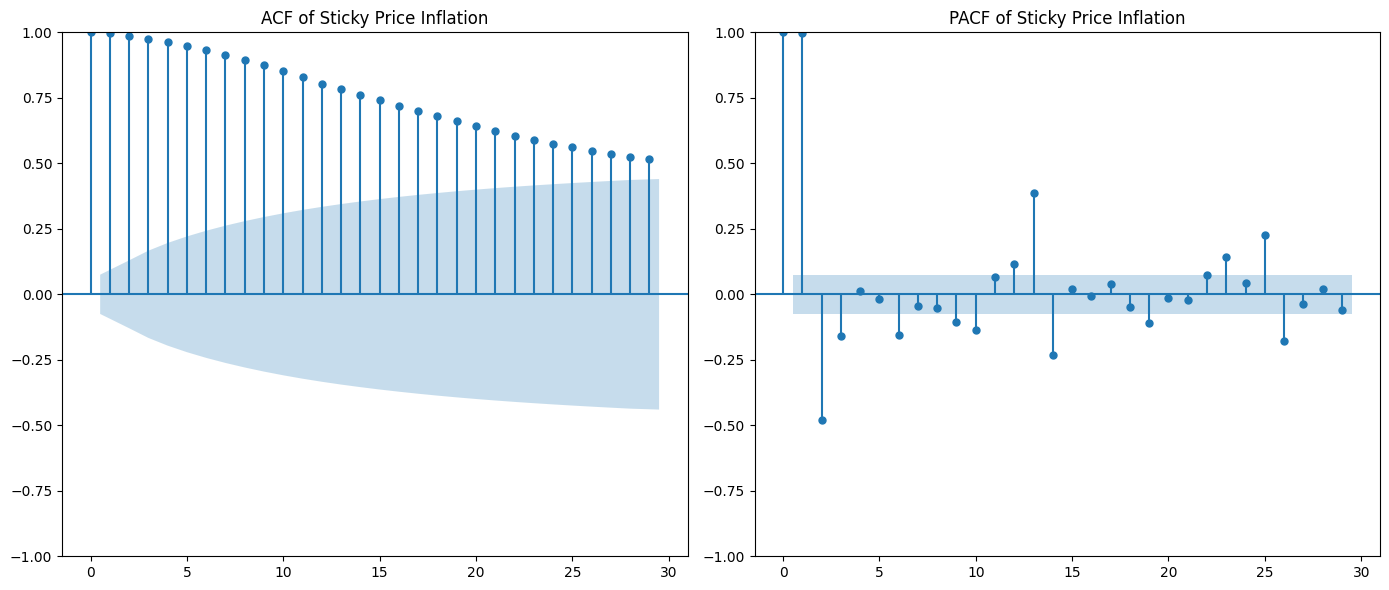

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(sticky_price_inflation.dropna(), ax=plt.gca(), title='ACF of Sticky Price Inflation')

plt.subplot(1, 2, 2)
plot_pacf(sticky_price_inflation.dropna(), ax=plt.gca(), title='PACF of Sticky Price Inflation')

plt.tight_layout()
plt.show()

Correlograms with all significant lags are indications that the data is non-stationary. Non-stationary in a sense that it could be that (1) the series does not have a constant mean, (2) the series does not have a constant variance, or (3) the series does not have a constant autocovariance

We know that dealing with non-stationary data is cumbersome. But are their ways to get around it. Why don't we try getting logs

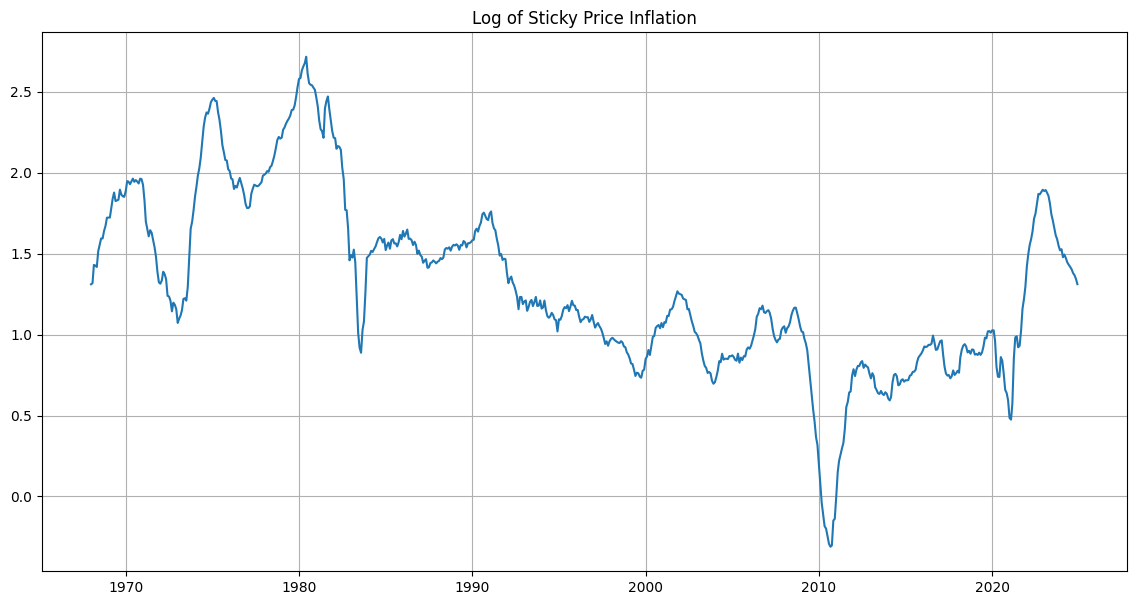

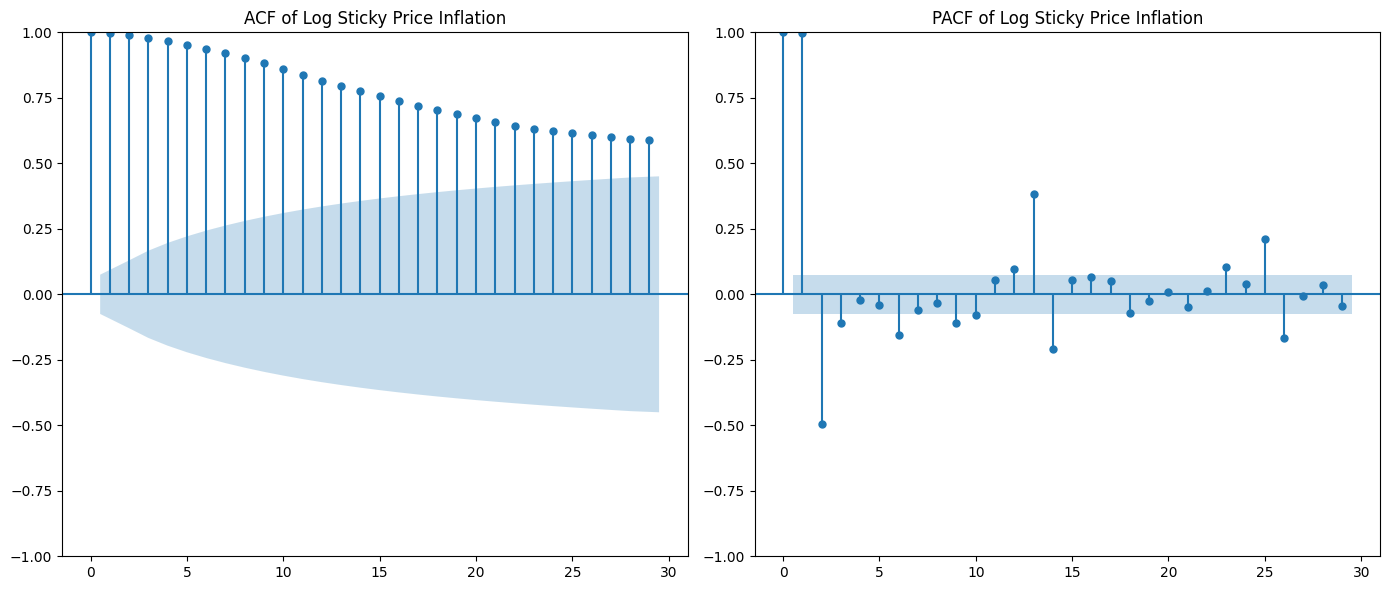

In [41]:
# Get the natural log of the series
log_sticky_price_inflation = np.log(sticky_price_inflation.dropna())

# Plot the log-transformed series
plt.figure(figsize=(14, 7))
plt.plot(log_sticky_price_inflation)
plt.title('Log of Sticky Price Inflation')
plt.grid(True)
plt.show()

# Plot the ACF and PACF of the log-transformed series
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(log_sticky_price_inflation, ax=plt.gca(), title='ACF of Log Sticky Price Inflation')

plt.subplot(1, 2, 2)
plot_pacf(log_sticky_price_inflation, ax=plt.gca(), title='PACF of Log Sticky Price Inflation')

plt.tight_layout()
plt.show()

If you recall in normal OLS regressions, sometimes, logs do things well. But in Time Series, it merely adjusts the scale, but there is no reflective change in the ACF and PACF. The most commonly used method to deal with non-stationarity is to $\textbf{difference}$ the series

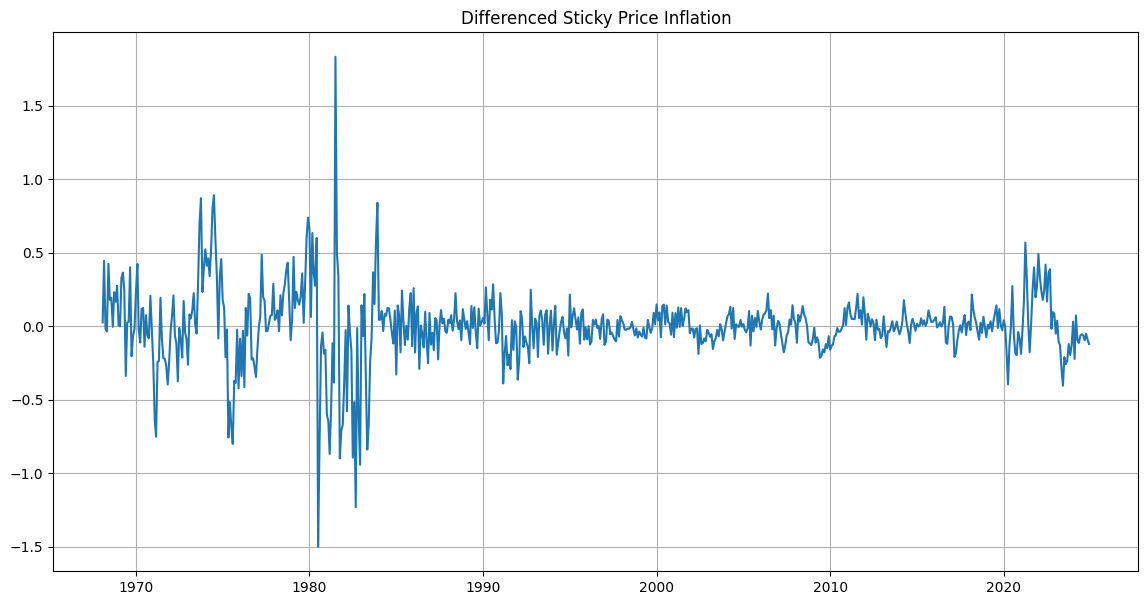

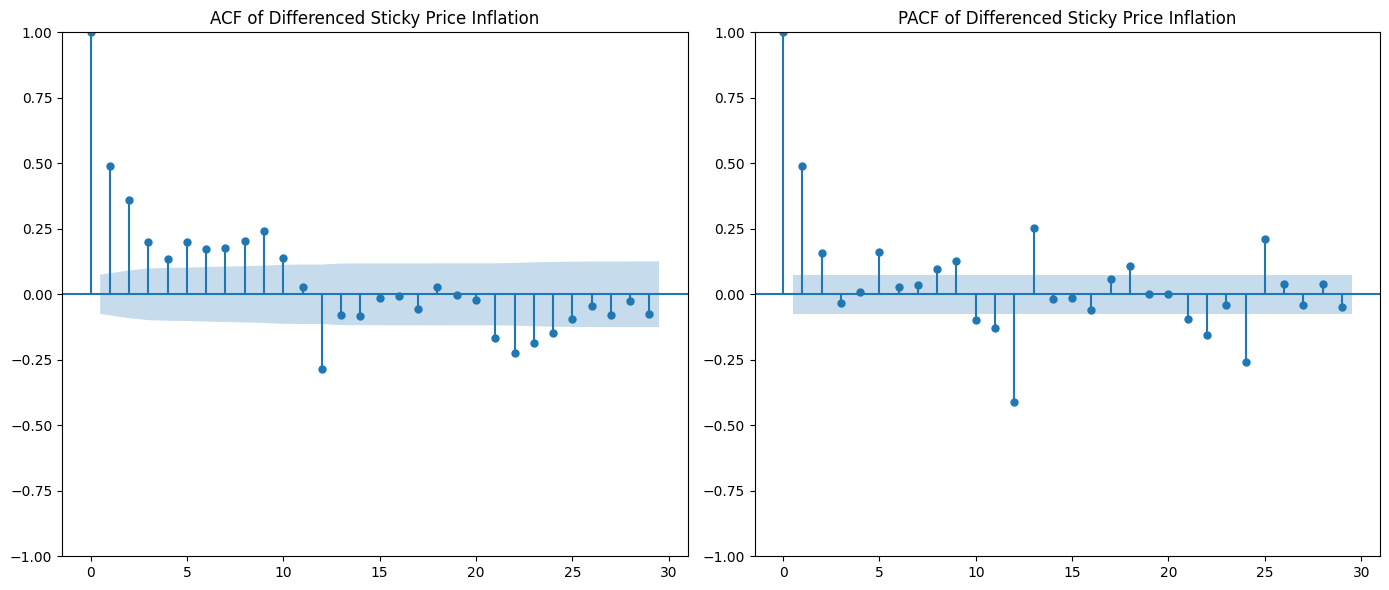

In [42]:
# Difference the series
diff_sticky_price_inflation = sticky_price_inflation.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(14, 7))
plt.plot(diff_sticky_price_inflation)
plt.title('Differenced Sticky Price Inflation')
plt.grid(True)
plt.show()

# Plot the ACF and PACF of the differenced series
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(diff_sticky_price_inflation, ax=plt.gca(), title='ACF of Differenced Sticky Price Inflation')

plt.subplot(1, 2, 2)
plot_pacf(diff_sticky_price_inflation, ax=plt.gca(), title='PACF of Differenced Sticky Price Inflation')

plt.tight_layout()
plt.show()

You see, much better, now there are still some significant lags, but surely not as much as before. 

Let us try one more transformation, the log-difference transformation

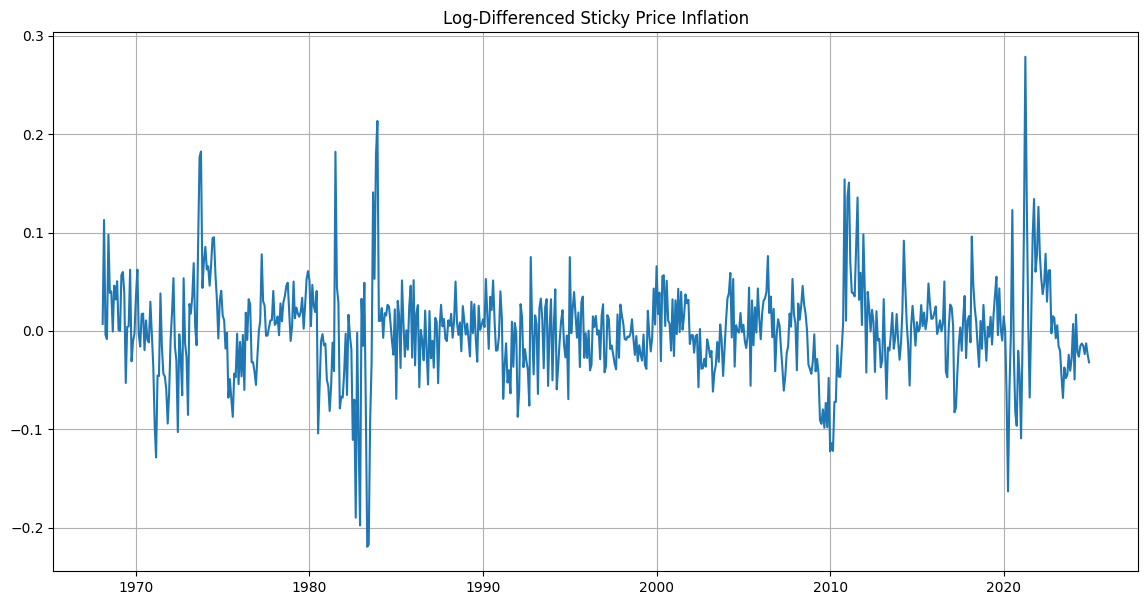

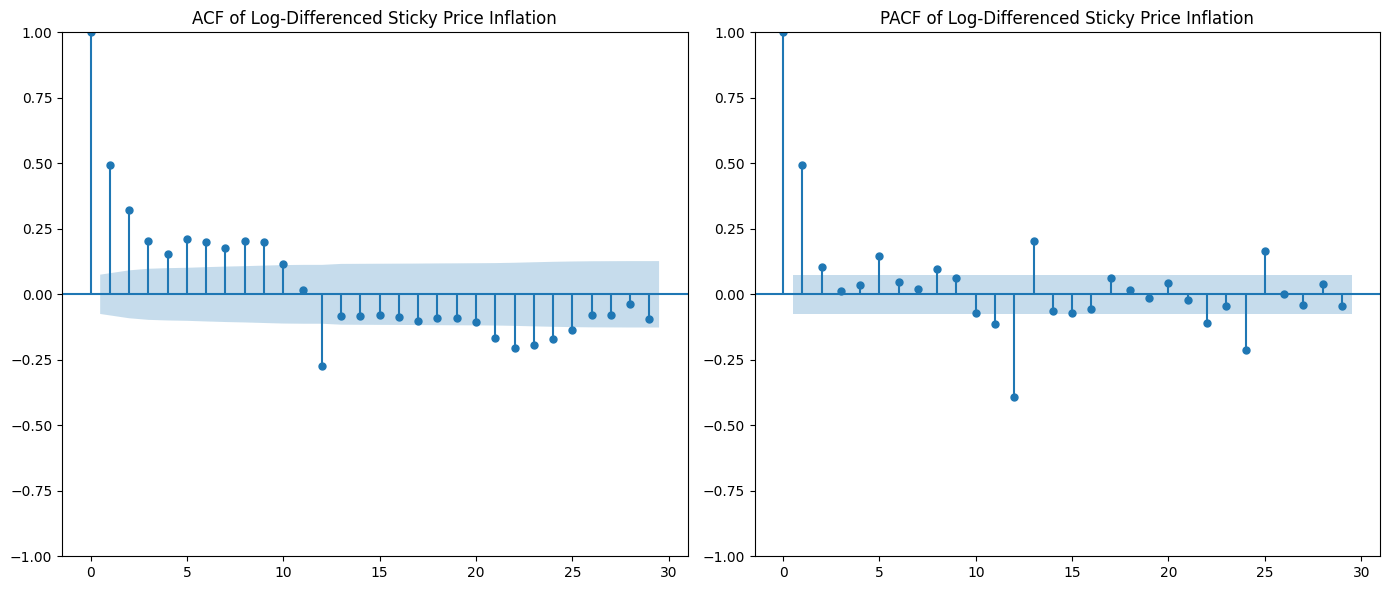

In [43]:
# Log difference transformation
log_diff_sticky_price_inflation = np.log(sticky_price_inflation).diff().dropna()

# Plot the log-differenced series
plt.figure(figsize=(14, 7))
plt.plot(log_diff_sticky_price_inflation)
plt.title('Log-Differenced Sticky Price Inflation')
plt.grid(True)
plt.show()

# Plot the ACF and PACF of the log-differenced series
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(log_diff_sticky_price_inflation, ax=plt.gca(), title='ACF of Log-Differenced Sticky Price Inflation')

plt.subplot(1, 2, 2)
plot_pacf(log_diff_sticky_price_inflation, ax=plt.gca(), title='PACF of Log-Differenced Sticky Price Inflation')

plt.tight_layout()
plt.show()

Next, let us now try to understand the concept of roots better. Let us simulate the following model $$y_t = c + 0.7y_{t-1} + e_t$$

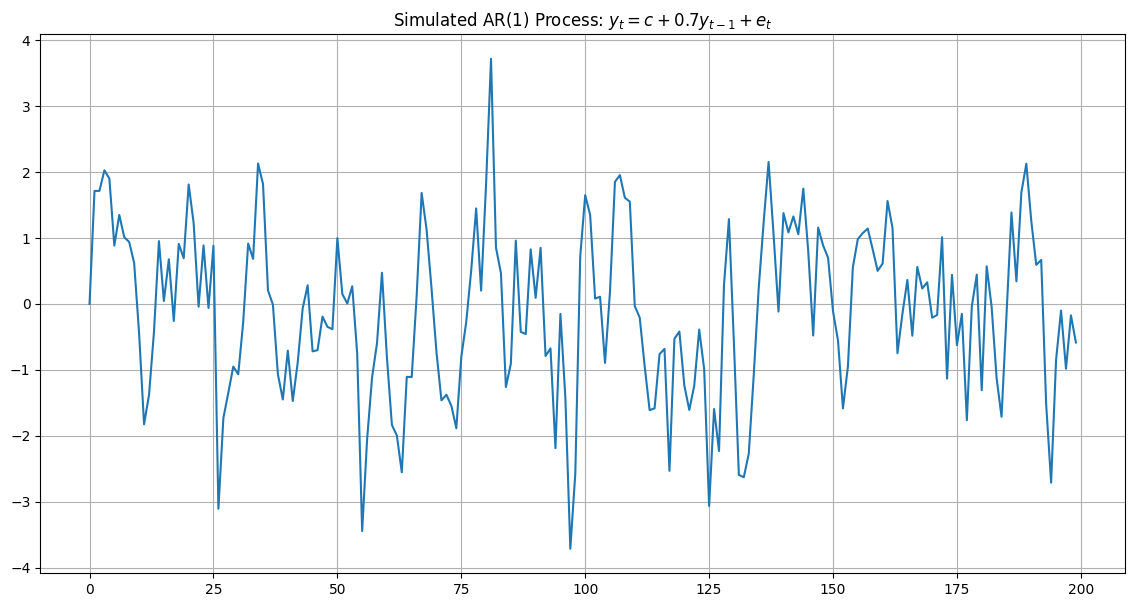

In [44]:
# Parameters
c = 0
phi = 0.7
T = 200

# Initialize the series
y = np.zeros(T)
e = np.random.normal(size=T)

# Simulate the AR(1) process
for t in range(1, T):
    y[t] = c + phi * y[t-1] + e[t]

# Plot the simulated series
plt.figure(figsize=(14, 7))
plt.plot(y)
plt.title('Simulated AR(1) Process: $y_t = c + 0.7y_{t-1} + e_t$')
plt.grid(True)
plt.show()

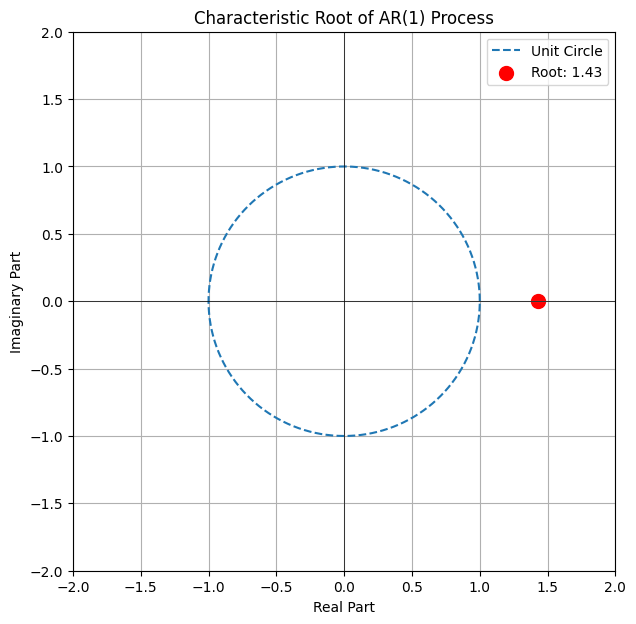

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameter for AR(1) process
phi = 0.7

# Compute the characteristic root
z = 1 / phi

# Generate the unit circle
theta = np.linspace(0, 2 * np.pi, 300)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)

# Plot the unit circle
plt.figure(figsize=(7, 7))
plt.plot(unit_circle_x, unit_circle_y, label="Unit Circle", linestyle='dashed')

# Plot the characteristic root
plt.scatter([z], [0], color='red', s=100, label=f"Root: {z:.2f}")

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Characteristic Root of AR(1) Process")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

This model will have some MA representation. Recall that any AR(p) with roots outside the unit circle has an MA representation. These processes are called stationary (because there is a weakly stationary version of them).

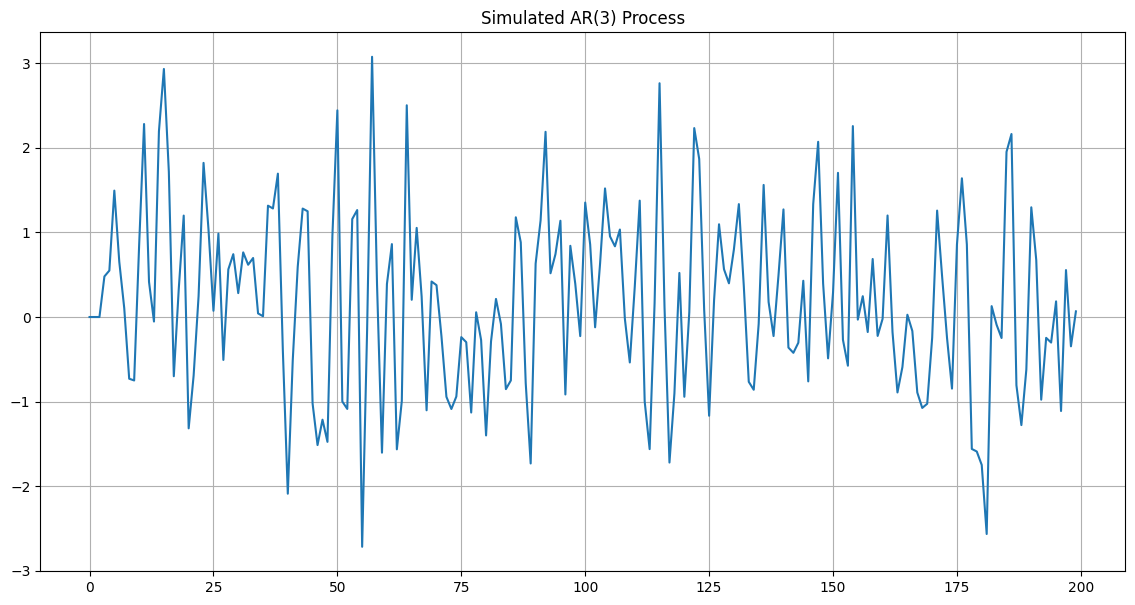

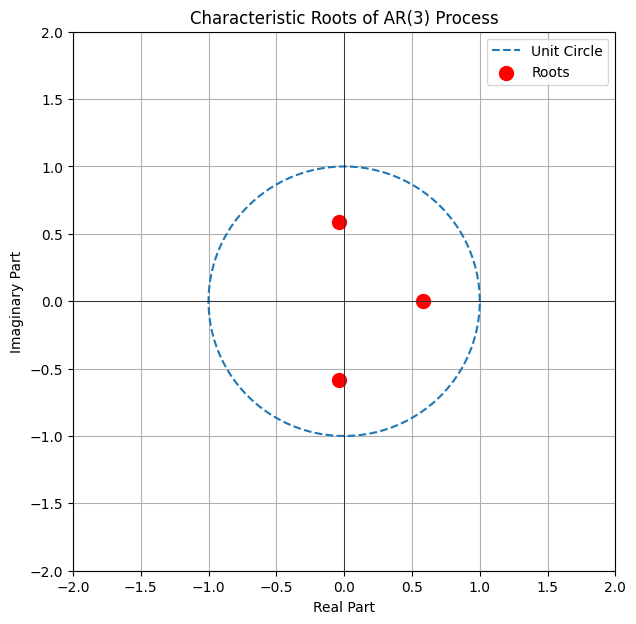

In [49]:
# Parameters for AR(3) process
phi_1 = 0.5
phi_2 = -0.3
phi_3 = 0.2
T = 200

# Initialize the series
y_ar3 = np.zeros(T)
e_ar3 = np.random.normal(size=T)

# Simulate the AR(3) process
for t in range(3, T):
    y_ar3[t] = phi_1 * y_ar3[t-1] + phi_2 * y_ar3[t-2] + phi_3 * y_ar3[t-3] + e_ar3[t]

# Plot the simulated series
plt.figure(figsize=(14, 7))
plt.plot(y_ar3)
plt.title('Simulated AR(3) Process')
plt.grid(True)
plt.show()

# Compute the characteristic roots
coefficients = [1, -phi_1, -phi_2, -phi_3]
roots = np.roots(coefficients)

# Generate the unit circle
theta = np.linspace(0, 2 * np.pi, 300)
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)

# Plot the unit circle and characteristic roots
plt.figure(figsize=(7, 7))
plt.plot(unit_circle_x, unit_circle_y, label="Unit Circle", linestyle='dashed')

# Plot the characteristic roots
plt.scatter(roots.real, roots.imag, color='red', s=100, label="Roots")

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Characteristic Roots of AR(3) Process")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

What do you observe?

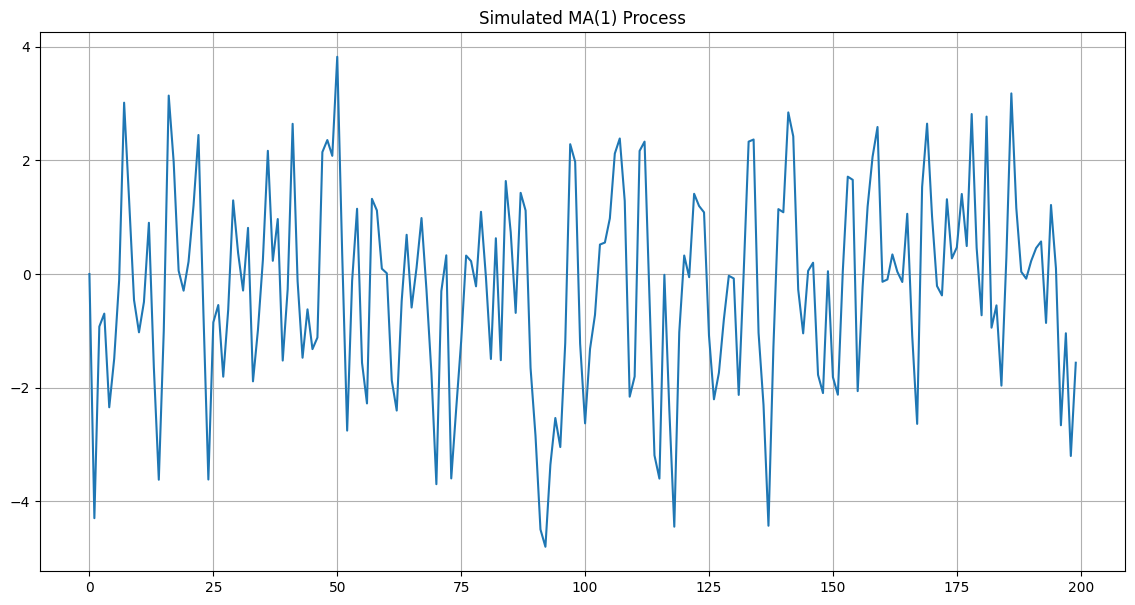

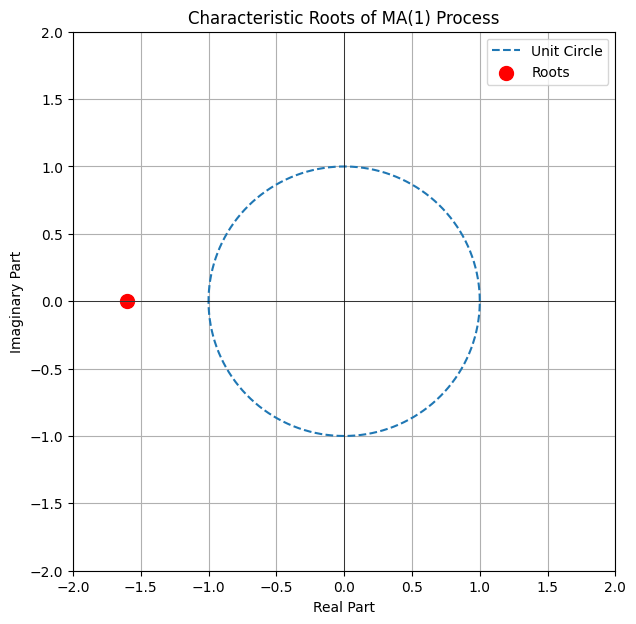

In [52]:
# Parameters for MA(1) process
theta = 1.6
T = 200

# Initialize the series
e_ma1 = np.random.normal(size=T)
y_ma1 = np.zeros(T)

# Simulate the MA(1) process
for t in range(1, T):
    y_ma1[t] = e_ma1[t] + theta * e_ma1[t-1]

# Plot the simulated series
plt.figure(figsize=(14, 7))
plt.plot(y_ma1)
plt.title('Simulated MA(1) Process')
plt.grid(True)
plt.show()

# Compute the characteristic roots
coefficients_ma1 = [1, theta]
roots_ma1 = np.roots(coefficients_ma1)

# Generate the unit circle
theta_vals = np.linspace(0, 2 * np.pi, 300)
unit_circle_x = np.cos(theta_vals)
unit_circle_y = np.sin(theta_vals)

# Plot the unit circle and characteristic roots
plt.figure(figsize=(7, 7))
plt.plot(unit_circle_x, unit_circle_y, label="Unit Circle", linestyle='dashed')

# Plot the characteristic roots
plt.scatter(roots_ma1.real, roots_ma1.imag, color='red', s=100, label="Roots")

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Characteristic Roots of MA(1) Process")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Any MA process with roots outside unit circle can be written as $AR(\infty)$,such processes called invertible. If $y_t = b(L)e_t$ is an invertible MA process, then $e_t = b(L)^{−1}y_t$ . That is, the ”errors” are laying in a space of observations and can be recovered from y’s 

                GDP
1946-01-01      NaN
1946-04-01      NaN
1946-07-01      NaN
1946-10-01      NaN
1947-01-01  243.164


/var/folders/ch/hh05jl8911q5dhp_1wptbrym0000gn/T/ipykernel_15055/2544058609.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/Users/justineloriaga/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/justineloriaga/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/justineloriaga/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  

Best ARMA order: (2, 0, 1)
Best AIC: 4084.904436061867


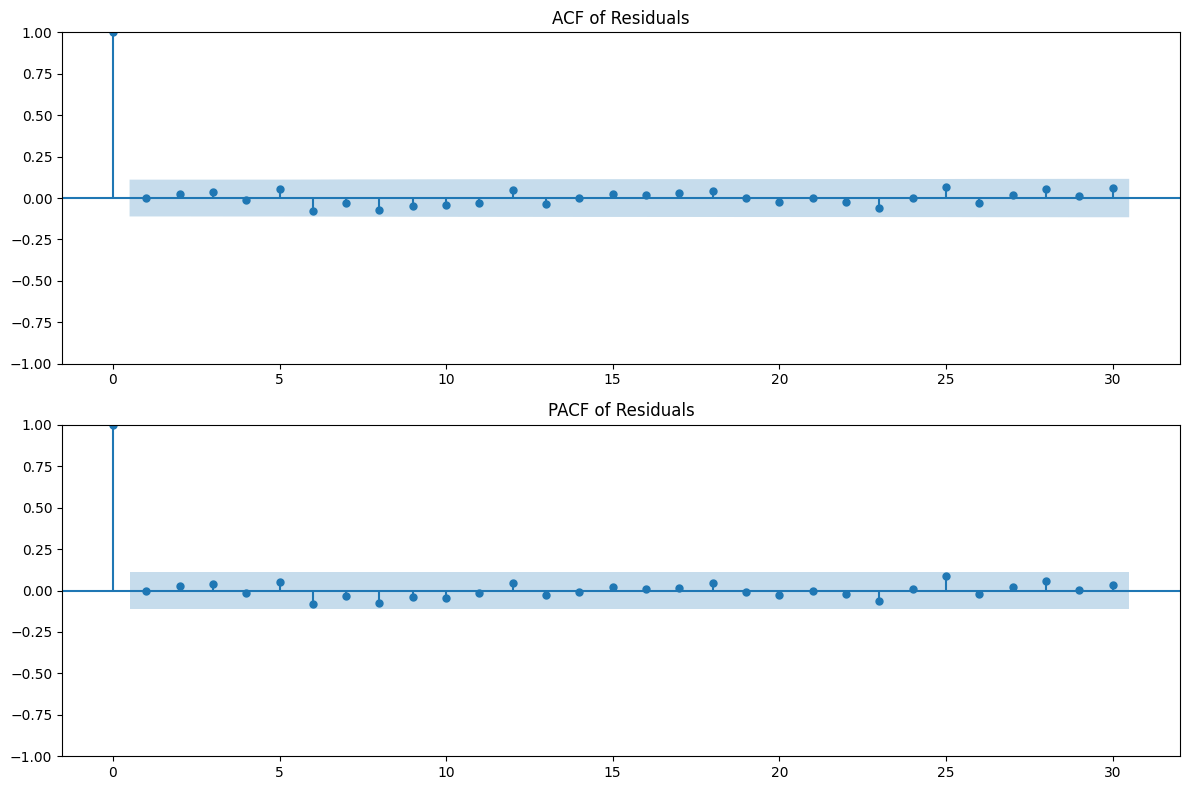

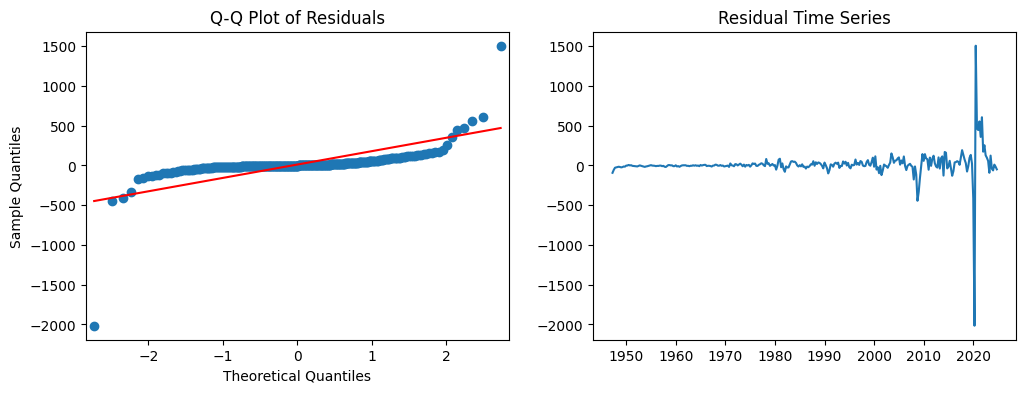

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools

########################################
# 1. Download data from FRED
########################################

# Let's pick a sample series, for example, "GDP" (US Real Gross Domestic Product).
series_id = 'GDP'
data = fred.get_series(series_id)

# Convert to a pandas DataFrame and add a date index. 
# The FRED series might already be properly indexed by date; 
# but let's ensure it is handled consistently:
df = pd.DataFrame(data, columns=[series_id])
df.index = pd.to_datetime(df.index)

# Inspect the first few rows
print(df.head())

# If the data frequency is not set, you can set it (e.g. quarterly, monthly).
# For GDP (quarterly), you might do:
df = df.asfreq('QS')

# Fill any missing values if needed (depends on the data)
df = df.fillna(method='ffill')

########################################
# 2. (Optional) Check if differencing is needed
########################################
df = df.diff().dropna()

########################################
# 3. Grid search to find the best ARMA(p,q)
########################################

# Define range for p and q
p_values = range(0, 5)  # Example: 0 to 4
q_values = range(0, 5)  # Example: 0 to 4
pq_combinations = list(itertools.product(p_values, q_values))

best_aic = np.inf
best_order = None
best_model = None

for p, q in pq_combinations:
    try:
        # ARIMA with (p, d=0, q) => ARMA(p,q)
        model = ARIMA(df, order=(p, 0, q))
        results = model.fit()
        
        # Check AIC
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = (p, 0, q)
            best_model = results
    except:
        # Some (p,q) may fail to converge; just ignore those
        continue

print("Best ARMA order:", best_order)
print("Best AIC:", best_aic)

########################################
# 4. Inspect the residuals & correlograms
########################################

residuals = best_model.resid

# Plot ACF/PACF of residuals to see if there's any leftover autocorrelation
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, lags=30, ax=ax[0])
ax[0].set_title('ACF of Residuals')
plot_pacf(residuals, lags=30, ax=ax[1])
ax[1].set_title('PACF of Residuals')
plt.tight_layout()
plt.show()

# Additionally, you might want to look at Q-Q plot or a simple residual plot:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sm.qqplot(residuals, line='s', ax=ax[0])
ax[0].set_title('Q-Q Plot of Residuals')
ax[1].plot(residuals)
ax[1].set_title('Residual Time Series')
plt.show()

########################################
# 5. Interpretation
########################################
# If the residuals ACF/PACF show no significant spikes at any lag (i.e., no remaining 
# autocorrelation structure), then the chosen (p,0,q) is likely adequate.
# If you see significant autocorrelation in the residuals, consider:
#   - Increasing p or q further
#   - Checking if the data requires differencing (d>0)
#   - Including seasonal terms if the data is strongly seasonal (SARIMAX)

Last, is how to use Yahoo Finance to get higher frequency data

[*********************100%***********************]  1 of 1 completed


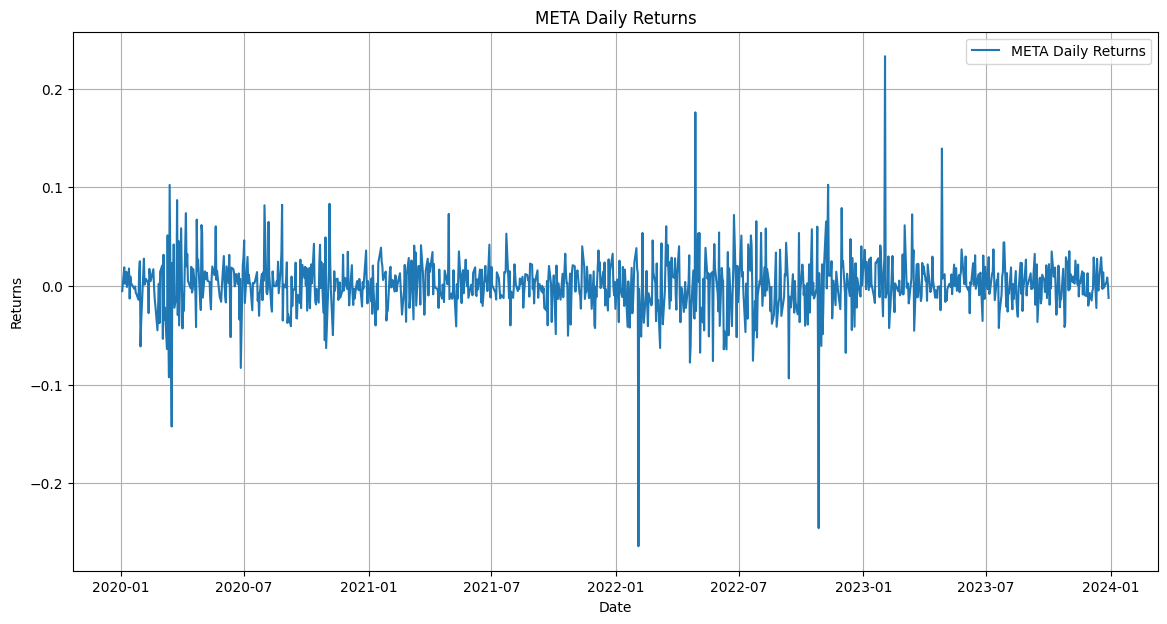

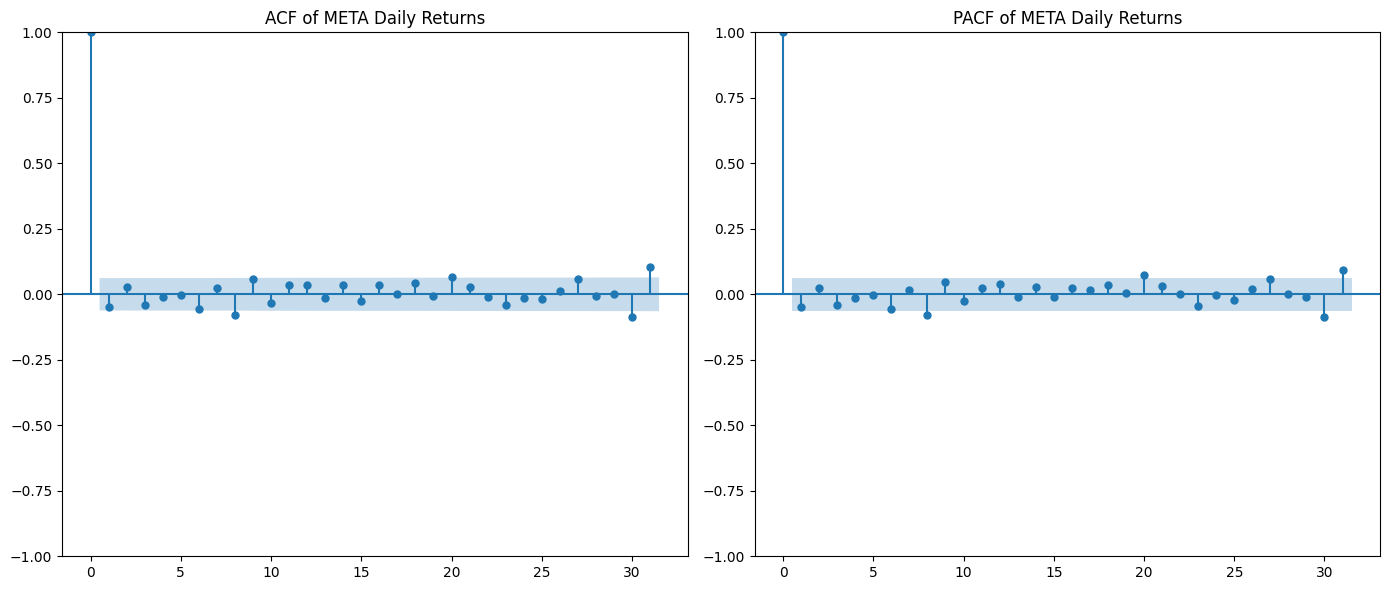

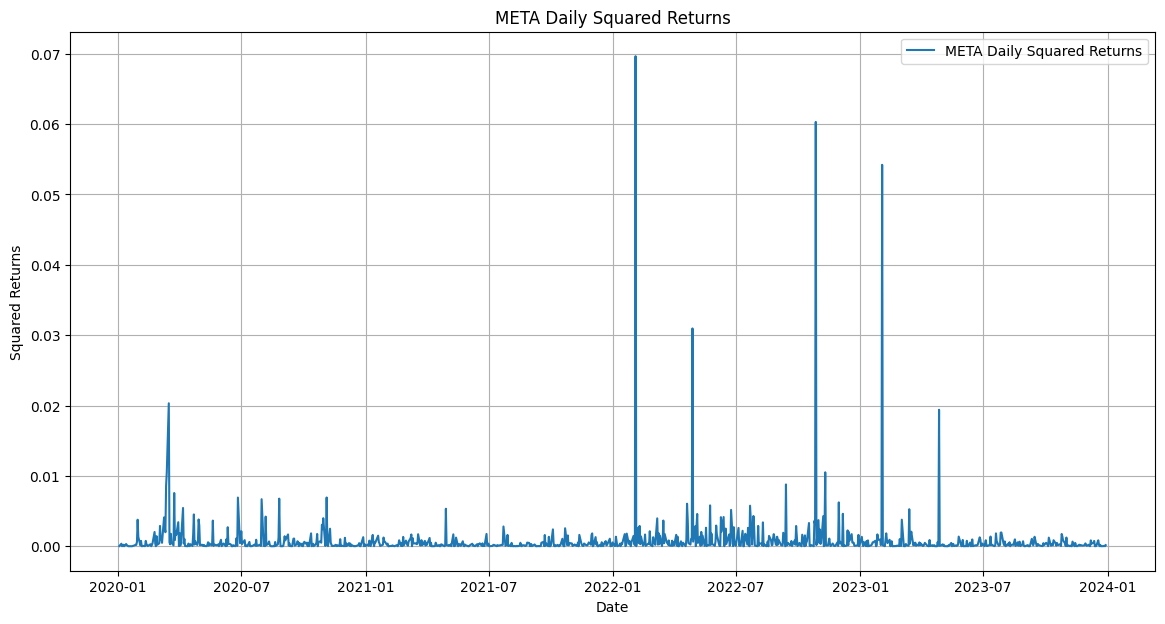

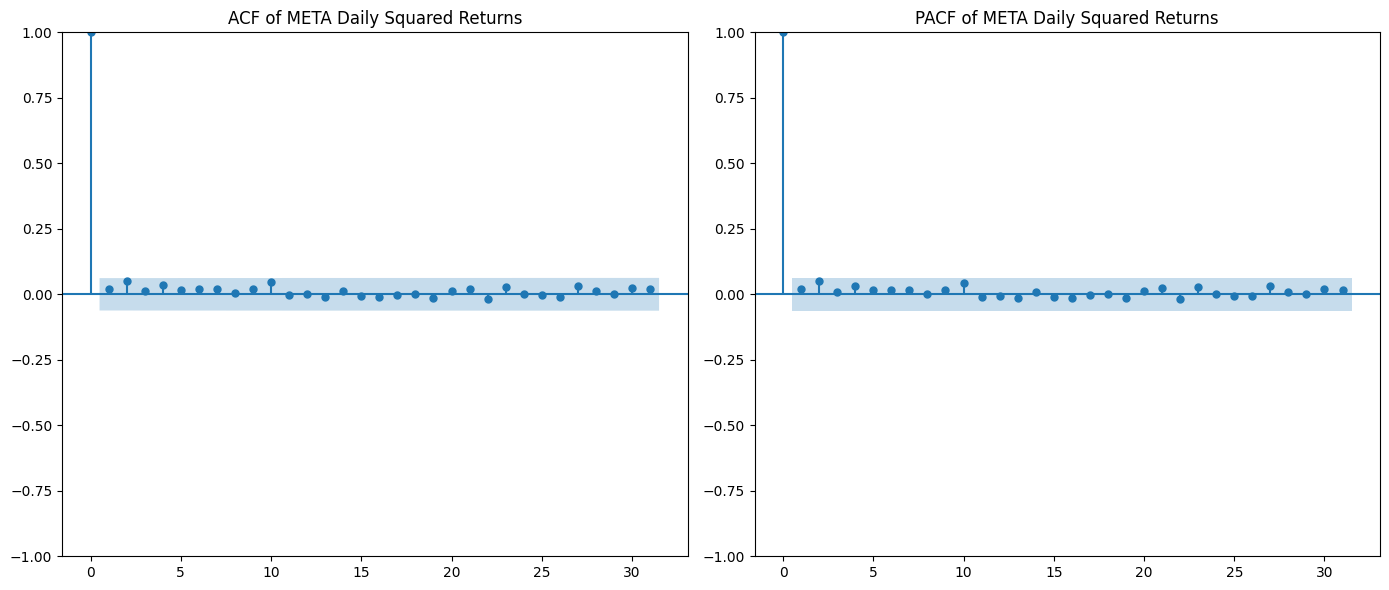

In [59]:
import yfinance as yf
import pandas as pd

import matplotlib.pyplot as plt

# Download daily stock prices for META
meta_data = yf.download('META', start='2020-01-01', end='2023-12-31')

# Calculate daily returns
meta_data['Returns'] = meta_data['Adj Close'].pct_change()

# Plot the returns
plt.figure(figsize=(14, 7))
plt.plot(meta_data['Returns'], label='META Daily Returns')
plt.title('META Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()
# Plot the ACF and PACF of the returns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(meta_data['Returns'].dropna(), ax=plt.gca(), title='ACF of META Daily Returns')

plt.subplot(1, 2, 2)
plot_pacf(meta_data['Returns'].dropna(), ax=plt.gca(), title='PACF of META Daily Returns')

plt.tight_layout()
plt.show()
# Plot the square of the returns
plt.figure(figsize=(14, 7))
plt.plot(meta_data['Returns']**2, label='META Daily Squared Returns')
plt.title('META Daily Squared Returns')
plt.xlabel('Date')
plt.ylabel('Squared Returns')
plt.legend()
plt.grid(True)
plt.show()
# Plot the ACF and PACF of the squared returns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(meta_data['Returns'].dropna()**2, ax=plt.gca(), title='ACF of META Daily Squared Returns')

plt.subplot(1, 2, 2)
plot_pacf(meta_data['Returns'].dropna()**2, ax=plt.gca(), title='PACF of META Daily Squared Returns')

plt.tight_layout()
plt.show()